In [2]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059444,58435200
...,...,...,...,...,...,...,...
9404,2023-07-10,334.600006,335.230011,327.589996,331.829987,331.829987,32791400
9405,2023-07-11,331.059998,332.859985,327.000000,332.470001,332.470001,26698200
9406,2023-07-12,336.600006,341.649994,335.670013,337.200012,337.200012,29995300
9407,2023-07-13,339.559998,343.739990,339.019989,342.660004,342.660004,20567200


In [3]:
df = df[["Date","Close"]]
df

,Date,Close
0,1986-03-14,0.100694
1,1986-03-17,0.102431
2,1986-03-18,0.099826
3,1986-03-19,0.098090
4,1986-03-20,0.095486
...,...,...
9404,2023-07-10,331.829987
9405,2023-07-11,332.470001
9406,2023-07-12,337.200012
9407,2023-07-13,342.660004


In [4]:
df['Date']

0       1986-03-14
1       1986-03-17
2       1986-03-18
3       1986-03-19
4       1986-03-20
           ...    
9404    2023-07-10
9405    2023-07-11
9406    2023-07-12
9407    2023-07-13
9408    2023-07-14
Name: Date, Length: 9409, dtype: object

In [5]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year = year, month = month, day= day)


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)

C:\Users\91896\AppData\Local\Temp\ipykernel_21096\3172778012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [7]:
df['Date']

0      1986-03-14
1      1986-03-17
2      1986-03-18
3      1986-03-19
4      1986-03-20
          ...    
9404   2023-07-10
9405   2023-07-11
9406   2023-07-12
9407   2023-07-13
9408   2023-07-14
Name: Date, Length: 9409, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
1986-03-20,0.095486
...,...
2023-07-10,331.829987
2023-07-11,332.470001
2023-07-12,337.200012


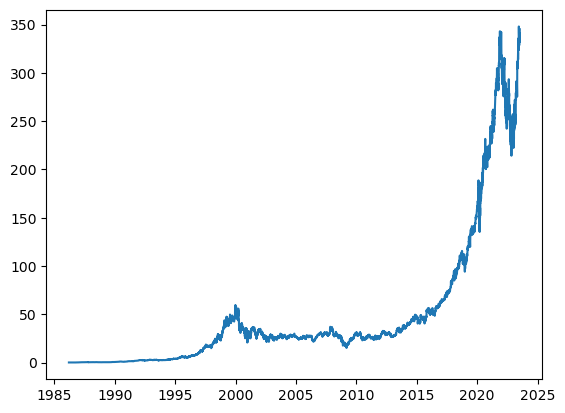

In [9]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [25]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date
  
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
    
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
        if last_time:
            break
    
        target_date = next_date

        if target_date == last_date:
            last_time = True
    
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
  
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
  
    ret_df['Target'] = Y

    return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [26]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates),middle_matrix.shape[1], 1))
    
    Y = df_as_np[:, -1]
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

## Splitting dataset into training set, validation set and test set


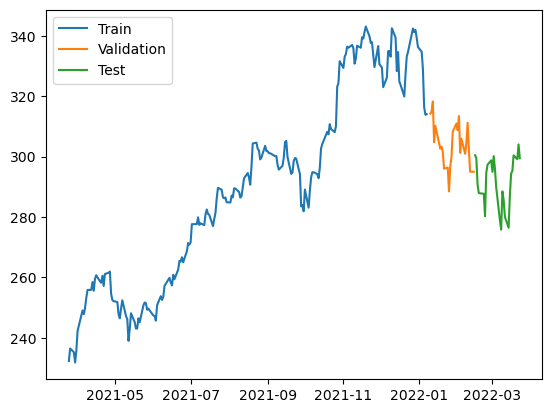

In [27]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

## Making a model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                   layers.LSTM(64), 
                   layers.Dense(32, activation='relu'),
                   layers.Dense(32, activation='relu'),
                   layers.Dense(1)])
model.compile(loss = 'mse', 
              optimizer=Adam(learning_rate=0.001),
             metrics = ['mean_absolute_error'])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100)
                                

Epoch 1/100
7/7 [==============================] - 6s 213ms/step - loss: 84767.9922 - mean_absolute_error: 289.4103 - val_loss: 92320.1016 - val_mean_absolute_error: 303.7551
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 84353.6250 - mean_absolute_error: 288.6904 - val_loss: 91989.6562 - val_mean_absolute_error: 303.2106
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 84059.5156 - mean_absolute_error: 288.1815 - val_loss: 91694.8906 - val_mean_absolute_error: 302.7242
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 83758.0469 - mean_absolute_error: 287.6594 - val_loss: 91334.2891 - val_mean_absolute_error: 302.1280
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 83406.1328 - mean_absolute_error: 287.0467 - val_loss: 90953.9531 - val_mean_absolute_error: 301.4978
Epoch 6/100
7/7 [==============================] - 0s 16ms/step - loss: 83003.7578 - mean_absolute_error: 286.3437 - val_loss: 90

7/7 [==============================] - 0s 13ms/step - loss: 1009.3820 - mean_absolute_error: 26.8549 - val_loss: 274.6142 - val_mean_absolute_error: 14.9547
Epoch 49/100
7/7 [==============================] - 0s 12ms/step - loss: 1011.5198 - mean_absolute_error: 26.8977 - val_loss: 302.4895 - val_mean_absolute_error: 15.7964
Epoch 50/100
7/7 [==============================] - 0s 12ms/step - loss: 1010.7511 - mean_absolute_error: 26.8778 - val_loss: 295.2228 - val_mean_absolute_error: 15.5774
Epoch 51/100
7/7 [==============================] - 0s 12ms/step - loss: 1008.9282 - mean_absolute_error: 26.8529 - val_loss: 297.1551 - val_mean_absolute_error: 15.6374
Epoch 52/100
7/7 [==============================] - 0s 14ms/step - loss: 1003.0879 - mean_absolute_error: 26.7737 - val_loss: 274.5172 - val_mean_absolute_error: 14.9544
Epoch 53/100
7/7 [==============================] - 0s 13ms/step - loss: 1005.8569 - mean_absolute_error: 26.8139 - val_loss: 257.3453 - val_mean_absolute_error: 1

7/7 [==============================] - 0s 13ms/step - loss: 25.6547 - mean_absolute_error: 4.0747 - val_loss: 35.5307 - val_mean_absolute_error: 4.8364
Epoch 98/100
7/7 [==============================] - 0s 12ms/step - loss: 26.7330 - mean_absolute_error: 4.0383 - val_loss: 35.4343 - val_mean_absolute_error: 4.8254
Epoch 99/100
7/7 [==============================] - 0s 13ms/step - loss: 24.6760 - mean_absolute_error: 3.8548 - val_loss: 34.7183 - val_mean_absolute_error: 4.7970
Epoch 100/100
7/7 [==============================] - 0s 16ms/step - loss: 26.1774 - mean_absolute_error: 3.9548 - val_loss: 63.3215 - val_mean_absolute_error: 6.4095


7/7 [==============================] - 1s 7ms/step


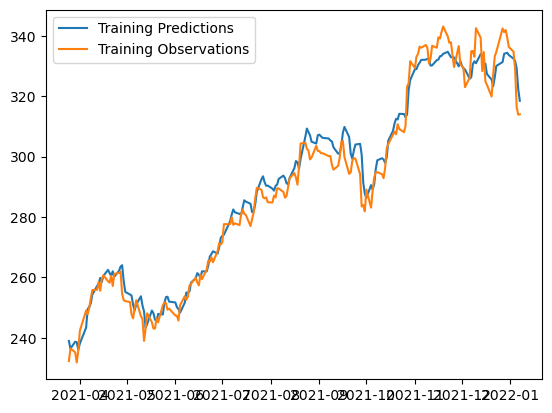

In [29]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train,train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 50ms/step


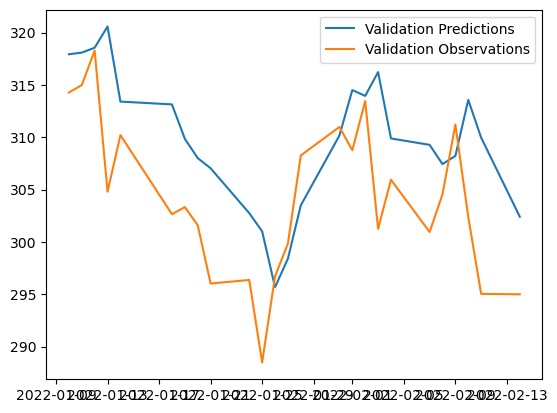

In [30]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 50ms/step


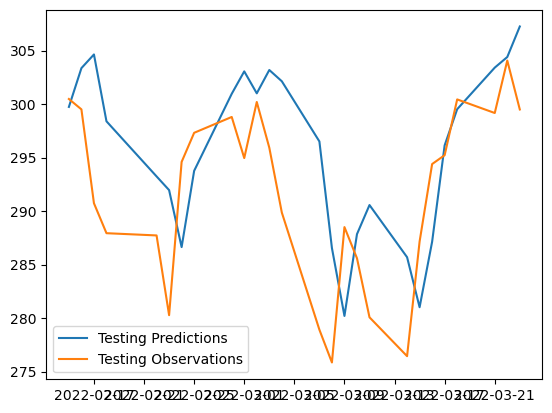

In [31]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

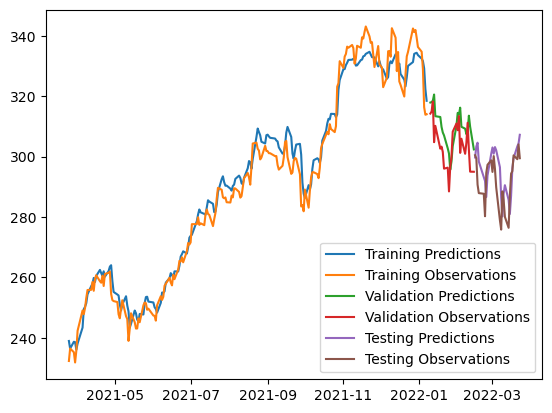

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [33]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

1/1 [==============================] - 0s 29ms/step


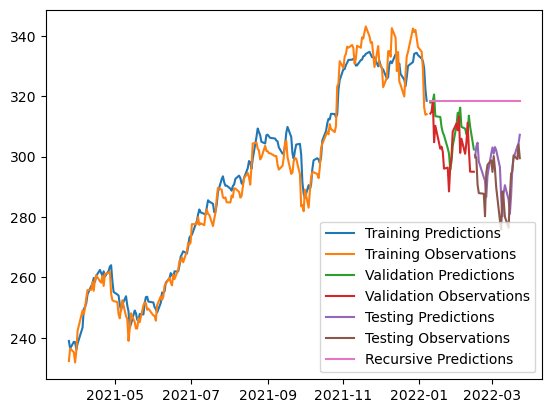

In [34]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])